In [4]:
import numpy as np
import matplotlib.pyplot as plt
import glob

output_path = '/cluster/home/buchsr/output'
output_path = '/Users/romainbuchs/Documents/ETHZ/Modelling and Simulating Social Systems/output'

## Small graph: n=500, m=1000

In [9]:
tag = 'fig2_test'
list_files = glob.glob('{0}/ComponentsSize_{1}_n500_m1000_gamma10_niter100_phi*.npy'.format(output_path, tag))
phis = [float(f.split('phi_')[1].split('.npy')[0]) for f in list_files]
list_files

['/Users/romainbuchs/Documents/ETHZ/Modelling and Simulating Social Systems/output/ComponentsSize_fig2_test_n500_m1000_gamma10_niter100_phi_0.96.npy']

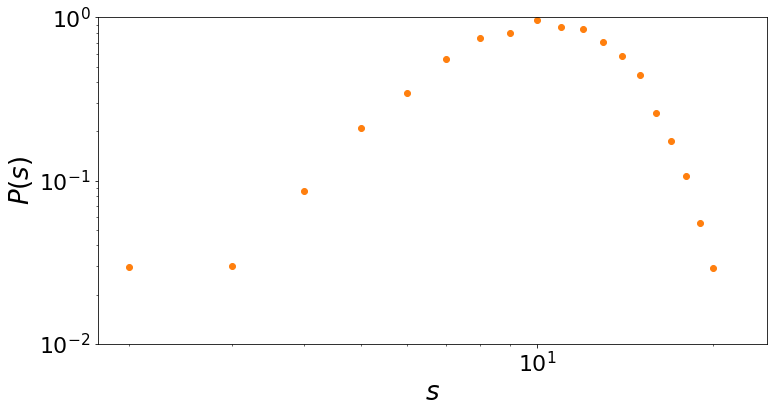

In [44]:
df = np.load(list_files[0])
size = np.arange(df.shape[1])
biggest_community = size[df.mean(axis=0)!=0].max()

df_proba = df.sum(axis=0)/df.sum()
biggest_community = size[df_proba!=0].max()

fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(size[2:biggest_community], df_proba[2:biggest_community]*size[2:biggest_community], color='C1')

ax.set_xlabel('$s$', fontsize=26)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim((1e-2,1))
ax.set_ylabel('$P(s)$', fontsize=26)
ax.tick_params(labelsize=22)

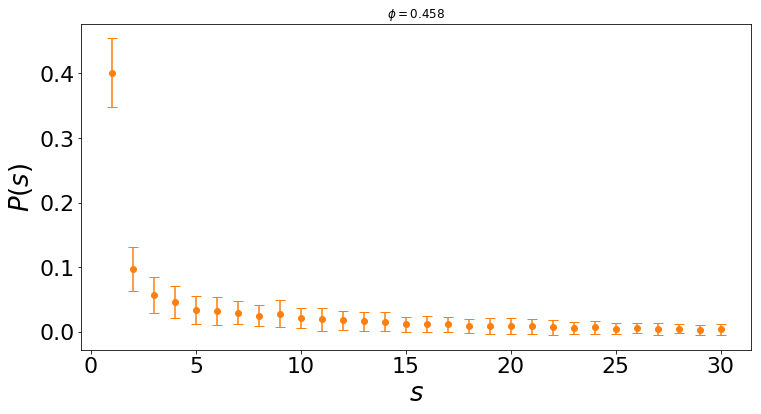

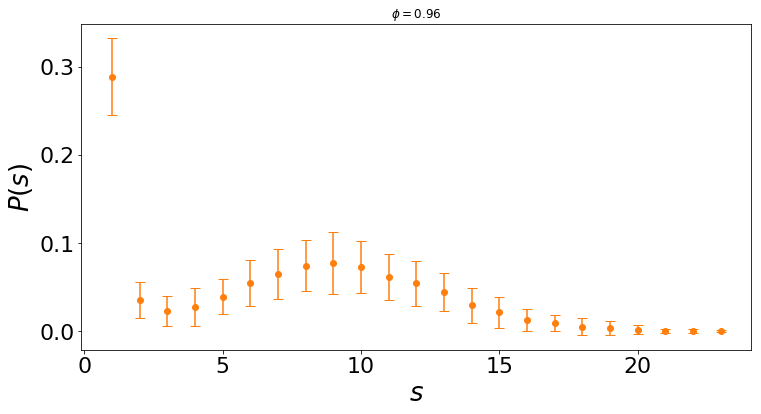

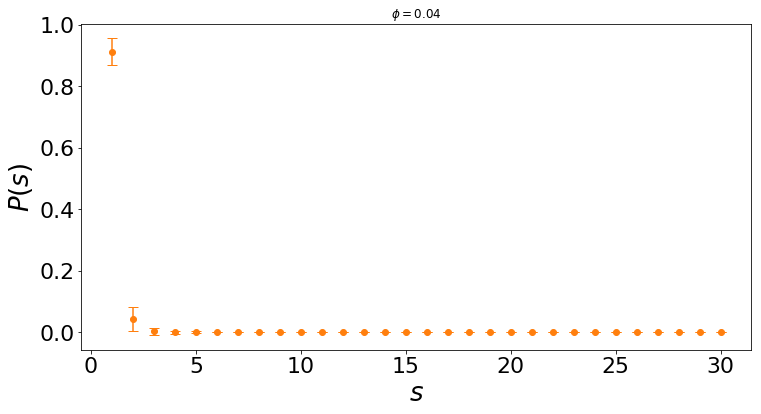

In [8]:
for i, phi in enumerate(phis):   
    df = np.load(list_files[i])
    size = np.arange(df.shape[1])
    biggest_community = size[df.mean(axis=0)!=0].max()

    new_df = df[:, 1:biggest_community]
    new_size = size[1:biggest_community]
    df_proba = (new_df/new_df.sum(axis=1)[:,None])

    fig, ax = plt.subplots(figsize=(12, 6))
    ax.errorbar(new_size[:30], df_proba.mean(axis=0)[:30], yerr=df_proba.std(axis=0)[:30], fmt='o', capsize=5, color='C1')

    ax.set_title('$\phi={0}$'.format(phi))
    ax.set_xlabel('$s$', fontsize=26)
    ax.set_ylabel('$P(s)$', fontsize=26)
    ax.tick_params(labelsize=22)

## Bigger graph

In [10]:
list_files = glob.glob('{0}/ComponentsSize_phi*.npy'.format(output_path))
list_files

['/cluster/home/buchsr/output/ComponentsSize_phi_0.96.npy']

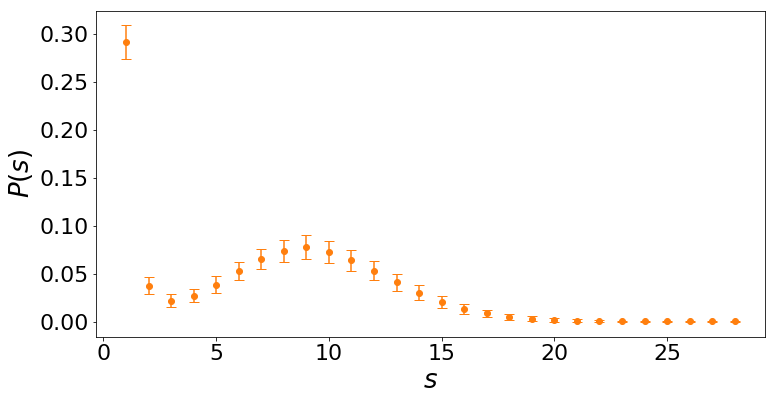

In [12]:
df = np.load(list_files[0])
size = np.arange(df.shape[1])
biggest_community = size[df.mean(axis=0)!=0].max()

new_df = df[:, 1:biggest_community]
new_size = size[1:biggest_community]
df_proba = (new_df/new_df.sum(axis=1)[:,None])

fig, ax = plt.subplots(figsize=(12, 6))
ax.errorbar(new_size[:30], df_proba.mean(axis=0)[:30], yerr=df_proba.std(axis=0)[:30], fmt='o', capsize=5, color='C1')

ax.set_xlabel('$s$', fontsize=26)
ax.set_ylabel('$P(s)$', fontsize=26)
ax.tick_params(labelsize=22)

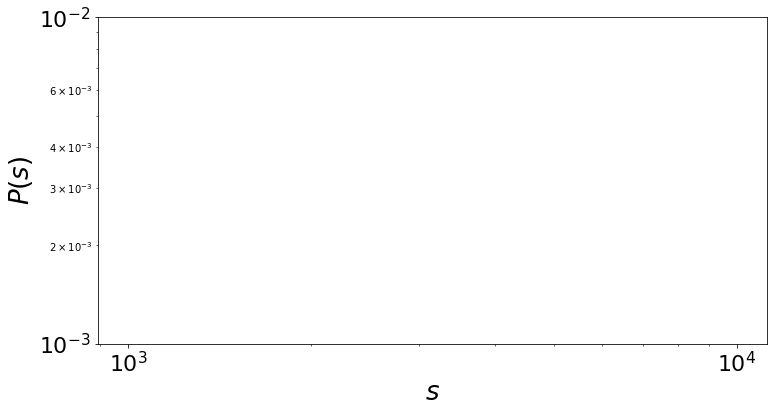

In [16]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(size, df.sum(axis=0)/df.sum(), marker='o', color='C1')

ax.set_xlabel('$s$', fontsize=26)
ax.set_ylabel('$P(s)$', fontsize=26)

ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(0.001,0.01)
ax.tick_params(labelsize=22)

In [12]:
def plot(df):
    size = np.arange(df.shape[1])
    biggest_community = size[df.mean(axis=0)!=0].max()
    
    new_df = df[:, :biggest_community]
    new_size = size[:biggest_community]
    df_proba = (new_df/new_df.sum(axis=1)[:,None])
    
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.errorbar(new_size, df_proba.mean(axis=0), yerr=df_proba.std(axis=0), fmt='o', capsize=5, color='C1')

    ax.set_xlabel('$s$', fontsize=26)
    ax.set_ylabel('$P(s)$', fontsize=26)
    ax.tick_params(labelsize=22)

In [13]:
list_files = glob.glob('{0}/ComponentsSize_fig2*.npy'.format(output_path))
list_files

['/cluster/home/buchsr/output/ComponentsSize_fig2_phi_0.96.npy',
 '/cluster/home/buchsr/output/ComponentsSize_fig2_phi_0.458.npy']

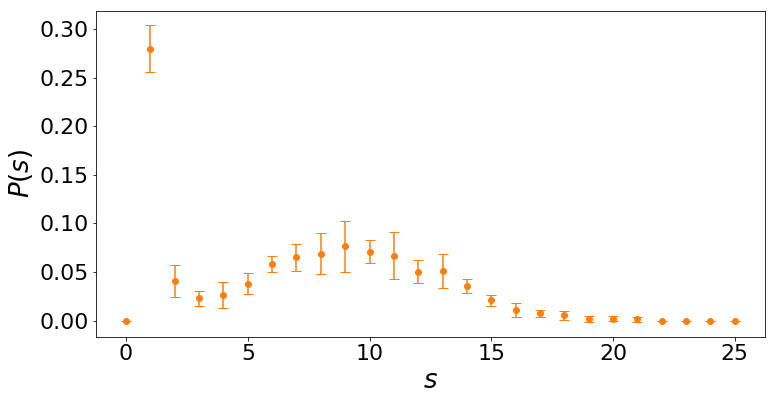

In [14]:
df = np.load(list_files[0])
plot(df)

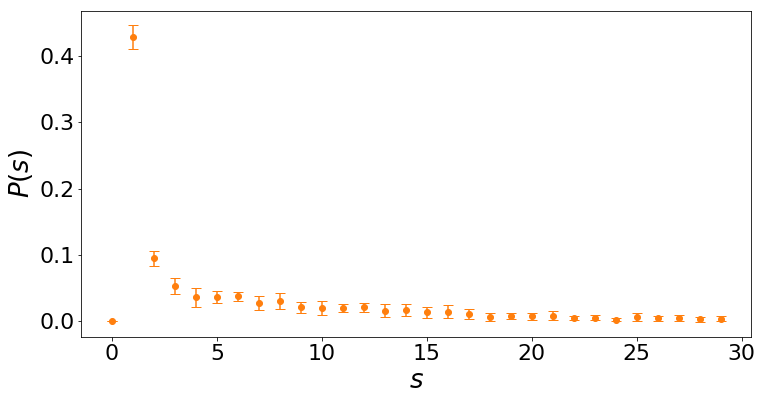

In [18]:
df = np.load(list_files[1])
size = np.arange(df.shape[1])
biggest_community = size[df.mean(axis=0)!=0].max()

new_df = df[:, :biggest_community]
new_size = size[:biggest_community]
df_proba = (new_df/new_df.sum(axis=1)[:,None])

fig, ax = plt.subplots(figsize=(12, 6))
ax.errorbar(new_size[:30], df_proba.mean(axis=0)[:30], yerr=df_proba.std(axis=0)[:30], fmt='o', capsize=5, color='C1')

ax.set_xlabel('$s$', fontsize=26)
ax.set_ylabel('$P(s)$', fontsize=26)
ax.tick_params(labelsize=22)